# Project Description

The data is stored in three files:

1. gold_recovery_train.csv — training dataset download
2. gold_recovery_test.csv — test dataset download
3. gold_recovery_full.csv — source dataset download

Data is indexed with the date and time of acquisition (date feature). Parameters that are next to each other in terms of time are often similar.

Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.

The source dataset contains the training and test sets with all the features.
You have the raw data that was only downloaded from the warehouse. Before building the model, check the correctness of the data. For that, use our instructions.

## Import and Prepare data 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("/datasets/gold_recovery_train.csv")
test_df = pd.read_csv("/datasets/gold_recovery_test.csv")
full_df = pd.read_csv("/datasets/gold_recovery_full.csv")

In [3]:
def output(df): 
    df = df.head()
    df_info = df.info()
    return df, df_info

In [4]:
output(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                5 non-null      object 
 1   final.output.concentrate_ag                         5 non-null      float64
 2   final.output.concentrate_pb                         5 non-null      float64
 3   final.output.concentrate_sol                        5 non-null      float64
 4   final.output.concentrate_au                         5 non-null      float64
 5   final.output.recovery                               5 non-null      float64
 6   final.output.tail_ag                                5 non-null      float64
 7   final.output.tail_pb                                5 non-null      float64
 8   final.output.tail_sol                               5 non-null      float64
 9   fin

(                  date  final.output.concentrate_ag  \
 0  2016-01-15 00:00:00                     6.055403   
 1  2016-01-15 01:00:00                     6.029369   
 2  2016-01-15 02:00:00                     6.055926   
 3  2016-01-15 03:00:00                     6.047977   
 4  2016-01-15 04:00:00                     6.148599   
 
    final.output.concentrate_pb  final.output.concentrate_sol  \
 0                     9.889648                      5.507324   
 1                     9.968944                      5.257781   
 2                    10.213995                      5.383759   
 3                     9.977019                      4.858634   
 4                    10.142511                      4.939416   
 
    final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
 0                    42.192020              70.541216             10.411962   
 1                    42.701629              69.266198             10.462676   
 2                    42.65750

In [5]:
output(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5 non-null      object 
 1   primary_cleaner.input.sulfate               5 non-null      float64
 2   primary_cleaner.input.depressant            5 non-null      float64
 3   primary_cleaner.input.feed_size             5 non-null      float64
 4   primary_cleaner.input.xanthate              5 non-null      float64
 5   primary_cleaner.state.floatbank8_a_air      5 non-null      float64
 6   primary_cleaner.state.floatbank8_a_level    5 non-null      float64
 7   primary_cleaner.state.floatbank8_b_air      5 non-null      float64
 8   primary_cleaner.state.floatbank8_b_level    5 non-null      float64
 9   primary_cleaner.state.floatbank8_c_air      5 non-null      float64
 10  primary_cleaner.st

(                  date  primary_cleaner.input.sulfate  \
 0  2016-09-01 00:59:59                     210.800909   
 1  2016-09-01 01:59:59                     215.392455   
 2  2016-09-01 02:59:59                     215.259946   
 3  2016-09-01 03:59:59                     215.336236   
 4  2016-09-01 04:59:59                     199.099327   
 
    primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
 0                         14.993118                         8.080000   
 1                         14.987471                         8.080000   
 2                         12.884934                         7.786667   
 3                         12.006805                         7.640000   
 4                         10.682530                         7.530000   
 
    primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
 0                        1.005021                             1398.981301   
 1                        0.990469                    

In [6]:
output(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                5 non-null      object 
 1   final.output.concentrate_ag                         5 non-null      float64
 2   final.output.concentrate_pb                         5 non-null      float64
 3   final.output.concentrate_sol                        5 non-null      float64
 4   final.output.concentrate_au                         5 non-null      float64
 5   final.output.recovery                               5 non-null      float64
 6   final.output.tail_ag                                5 non-null      float64
 7   final.output.tail_pb                                5 non-null      float64
 8   final.output.tail_sol                               5 non-null      float64
 9   fin

(                  date  final.output.concentrate_ag  \
 0  2016-01-15 00:00:00                     6.055403   
 1  2016-01-15 01:00:00                     6.029369   
 2  2016-01-15 02:00:00                     6.055926   
 3  2016-01-15 03:00:00                     6.047977   
 4  2016-01-15 04:00:00                     6.148599   
 
    final.output.concentrate_pb  final.output.concentrate_sol  \
 0                     9.889648                      5.507324   
 1                     9.968944                      5.257781   
 2                    10.213995                      5.383759   
 3                     9.977019                      4.858634   
 4                    10.142511                      4.939416   
 
    final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
 0                    42.192020              70.541216             10.411962   
 1                    42.701629              69.266198             10.462676   
 2                    42.65750

In [7]:
#date dtype should be datetime instead of object. Changing it to datetime
def datetime(df):
    df['date'] = pd.to_datetime(df['date'], format ='%Y-%m-%d')
    return df['date']

In [8]:
datetime(train_df)

0       2016-01-15 00:00:00
1       2016-01-15 01:00:00
2       2016-01-15 02:00:00
3       2016-01-15 03:00:00
4       2016-01-15 04:00:00
                ...        
16855   2018-08-18 06:59:59
16856   2018-08-18 07:59:59
16857   2018-08-18 08:59:59
16858   2018-08-18 09:59:59
16859   2018-08-18 10:59:59
Name: date, Length: 16860, dtype: datetime64[ns]

In [9]:
datetime(test_df)

0      2016-09-01 00:59:59
1      2016-09-01 01:59:59
2      2016-09-01 02:59:59
3      2016-09-01 03:59:59
4      2016-09-01 04:59:59
               ...        
5851   2017-12-31 19:59:59
5852   2017-12-31 20:59:59
5853   2017-12-31 21:59:59
5854   2017-12-31 22:59:59
5855   2017-12-31 23:59:59
Name: date, Length: 5856, dtype: datetime64[ns]

In [10]:
datetime(full_df)

0       2016-01-15 00:00:00
1       2016-01-15 01:00:00
2       2016-01-15 02:00:00
3       2016-01-15 03:00:00
4       2016-01-15 04:00:00
                ...        
22711   2018-08-18 06:59:59
22712   2018-08-18 07:59:59
22713   2018-08-18 08:59:59
22714   2018-08-18 09:59:59
22715   2018-08-18 10:59:59
Name: date, Length: 22716, dtype: datetime64[ns]

Naming and datatypes are corrected now.

In [31]:
#checking to see recovery is calculated correctly
def recovery_cal(row): 
    c = row['rougher.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']
    
    if f == 0: 
        return 0
    
    recovery = (c * (f - t)) / (f * (c - t)) * 100
    
    return recovery

In [32]:
train_df.dropna(subset=['rougher.output.recovery'], inplace=True)
train_df['recovery_calculated'] = train_df.apply(recovery_cal, axis=1)

In [33]:
mean_absolue_error = mean_absolute_error(train_df['rougher.output.recovery'],train_df['recovery_calculated'] )
print('MAE:', mean_absolue_error)

MAE: 9.303415616264301e-15


The MAE of 9.303415616264301e-15 tells us that the average magnitude  of error between the predicted and actual values are very miniscule. Therefore, the recovery is calculated correctly. 

In [34]:
def missing_values(df):
    df_ms = df.isna().sum().sum()
    return df_ms

print('Missing values for train df:', missing_values(train_df))
print('Missing values for test df:', missing_values(test_df))
print('Missing values for full df:', missing_values(full_df))

Missing values for train df: 4550
Missing values for test df: 2360
Missing values for full df: 36587


All three datasets have missing values.

In [35]:
#filling in the missing values 
def fill_missing_values(df):
    df_fill = df.ffill(inplace=True)
    return df_fill

fill_missing_values(train_df)
fill_missing_values(test_df)
fill_missing_values(full_df)

In [36]:
#checking to see there are still missing values 
def missing_values(df):
    df_ms = df.isna().sum().sum()
    return df_ms

print('Missing values for train df:', missing_values(train_df))
print('Missing values for test df:', missing_values(test_df))
print('Missing values for full df:', missing_values(full_df))

Missing values for train df: 0
Missing values for test df: 0
Missing values for full df: 0


In [37]:
#analyzing the features that are not in the test dataset
not_in_test = full_df.columns.difference(test_df.columns)
full_df[not_in_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22716 non-null  float64
 1   final.output.concentrate_au                         22716 non-null  float64
 2   final.output.concentrate_pb                         22716 non-null  float64
 3   final.output.concentrate_sol                        22716 non-null  float64
 4   final.output.recovery                               22716 non-null  float64
 5   final.output.tail_ag                                22716 non-null  float64
 6   final.output.tail_au                                22716 non-null  float64
 7   final.output.tail_pb                                22716 non-null  float64
 8   final.output.tail_sol                               22716 non-null  float64


There are 34 columns that are in full set but not in the test set. Those include the final.output, primary_cleaner.output, rougher.calculations, rougher.output, and secondary_cleaner.output columns. 

## Analyze the data

In [38]:
#seeing how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.
test_df=test_df.merge(full_df[['date','rougher.output.recovery', 'final.output.recovery']], how='left', on='date')

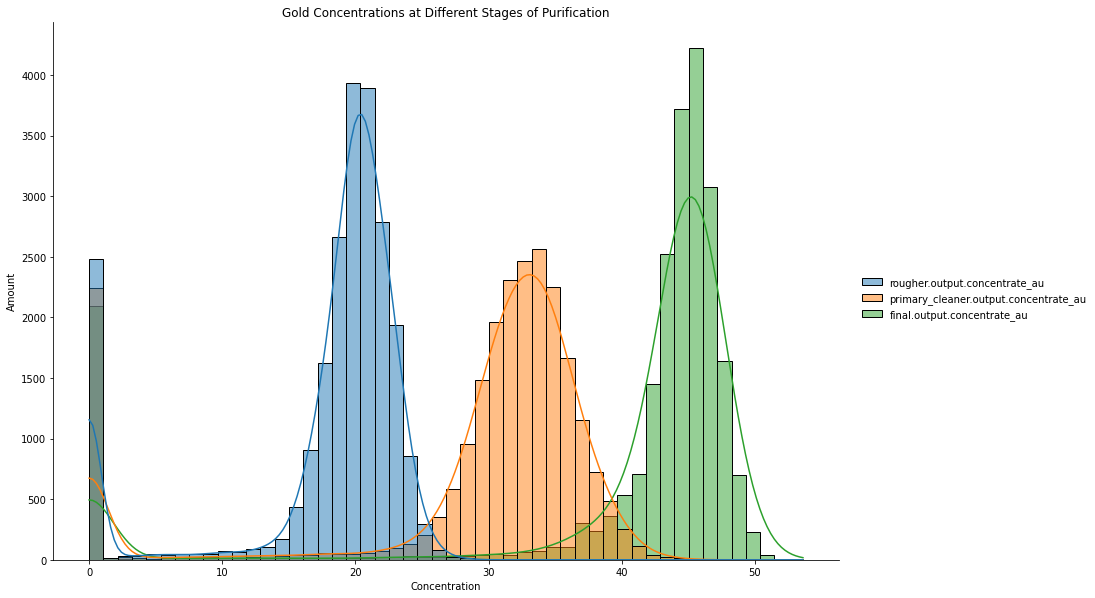

In [40]:
#plotting for au
bool_array = full_df[["rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]] > 10
filtered_df = full_df[bool_array]
au = full_df[["rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]]
sns.displot(au, kde=True, height=8,aspect =1.5)
plt.title('Gold Concentrations at Different Stages of Purification')
plt.xlabel('Concentration')
plt.ylabel('Amount')
plt.show()

The Au concentration increases as the purification process continues. The rougher output has the lowest concentration, then primary and lastly final ouptut.

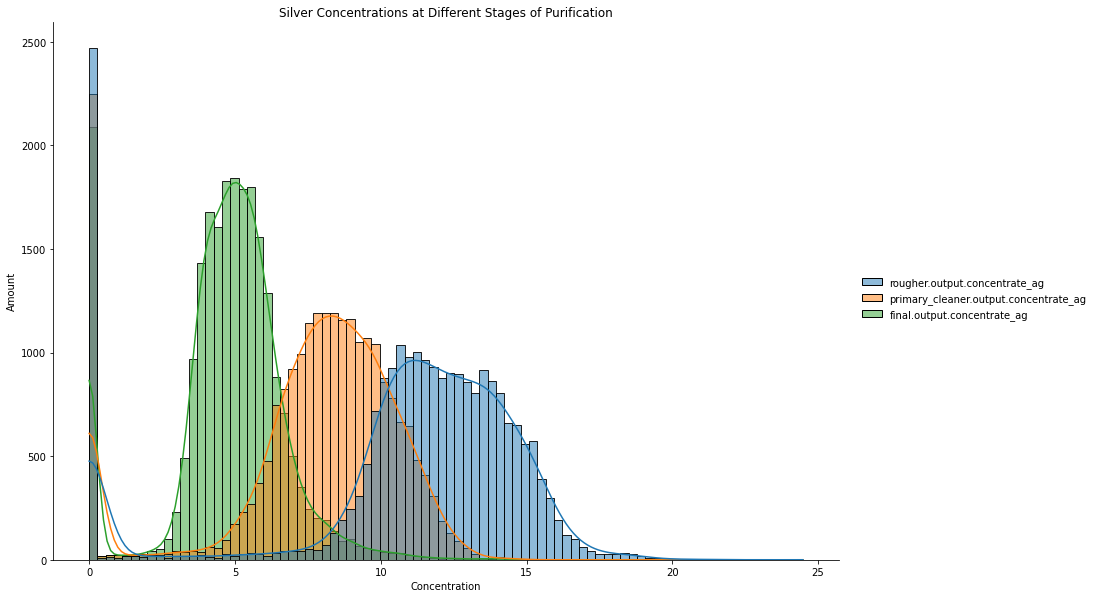

In [41]:
#plottting for ag
bool_array = full_df[["rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]] > 10
filtered_df = full_df[bool_array]
ag = full_df[["rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]]
sns.displot(ag, kde=True, height=8,aspect =1.5)
plt.title('Silver Concentrations at Different Stages of Purification')
plt.xlabel('Concentration')
plt.ylabel('Amount')
plt.show()

The concentration of Ag also decreases also the purification progresses. Final output has the slowest concentration, follow by primary and then rougher concentration.

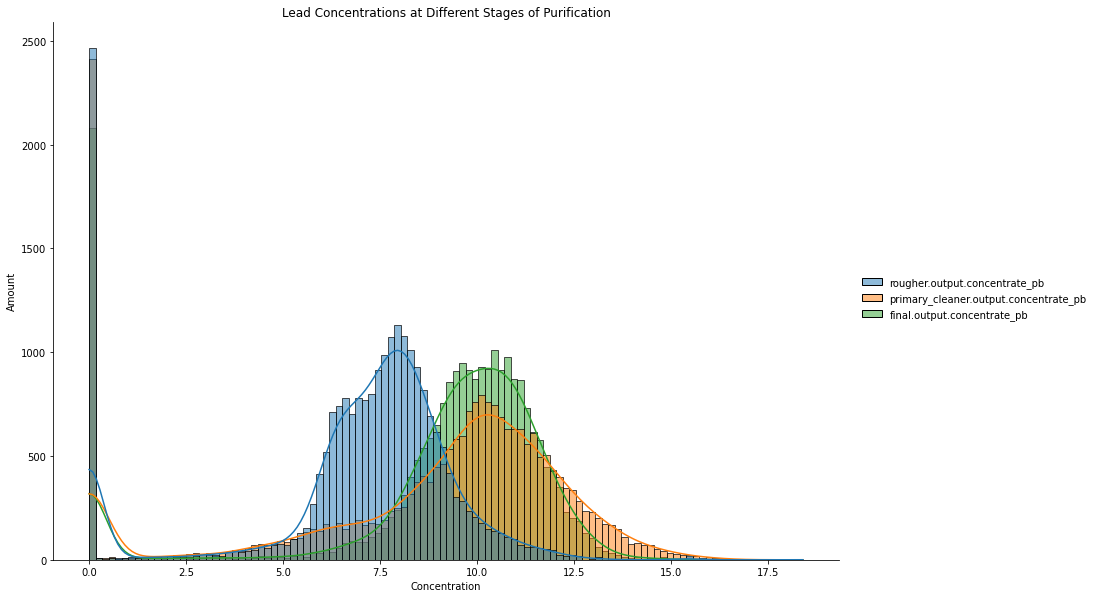

In [42]:
#plottting for pb
bool_array = full_df[["rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]] > 10
filtered_df = full_df[bool_array]
pb = full_df[["rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]]
sns.displot(pb, kde=True, height=8,aspect =1.5)
plt.title('Lead Concentrations at Different Stages of Purification')
plt.xlabel('Concentration')
plt.ylabel('Amount')
plt.show()

The concentration of Pb decreases as the purification progresses. The primary output has a higher concentration than the final output.

In [43]:
feed_columns = train_df.loc[:, train_df.columns.str.contains('feed_size')]
feed_columns.columns

Index(['primary_cleaner.input.feed_size', 'rougher.input.feed_size'], dtype='object')

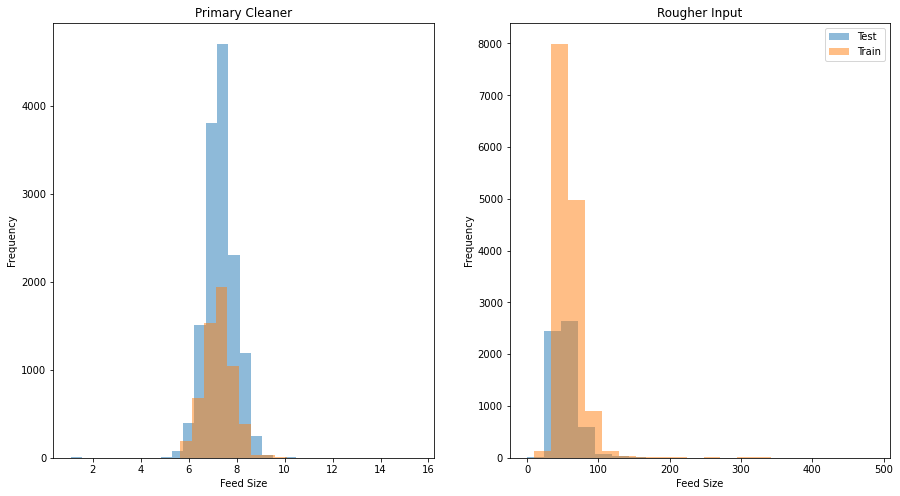

In [44]:
#Comparing the feed particle size distributions in the training set and in the test set.
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].hist(train_df['primary_cleaner.input.feed_size'], alpha=0.5, bins=20, label='Train')
axs[0].hist(test_df['primary_cleaner.input.feed_size'], alpha=0.5, bins=20,label='Test')
axs[0].set_title('Primary Cleaner')
axs[0].set_xlabel('Feed Size')
axs[0].set_ylabel('Frequency')

axs[1].hist(test_df['rougher.input.feed_size'], alpha=0.5, bins=20, label='Test')
axs[1].hist(train_df['rougher.input.feed_size'], alpha=0.5, bins=20,label='Train')
axs[1].set_title('Rougher Input')
axs[1].set_xlabel('Feed Size')
axs[1].set_ylabel('Frequency')

plt.legend()
plt.show()

The feed size of the rougher input is bigger than the feed size of the primary cleaner, which makes sense since the rougher input is the initial step of the cleaning process and its original size. For the rougher input, the test set has higher frequency than train set, and vice versa for the primary cleaner, but very similar distribution of feed size particles between the sets.

In [45]:
raw_feed_stages = full_df['rougher.input.feed_au'] + full_df['rougher.input.feed_ag'] + full_df['rougher.input.feed_pb'] + full_df['rougher.input.feed_sol']
rougher_concentration_stages = full_df['rougher.output.concentrate_au'] + full_df['rougher.output.concentrate_ag'] + full_df['rougher.output.concentrate_pb'] + full_df['rougher.output.concentrate_sol']
final_concentration_stages = full_df['final.output.concentrate_au'] + full_df['final.output.concentrate_ag'] + full_df['final.output.concentrate_pb'] + full_df['final.output.concentrate_sol'] 

Text(0.5, 1.0, 'Total Concentration of all Substances')

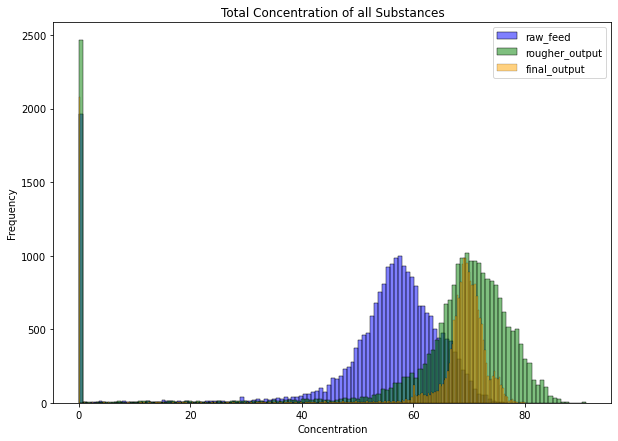

In [46]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(raw_feed_stages, color='blue', alpha=0.5, label='raw_feed')
sns.histplot(rougher_concentration_stages, color='green', alpha=0.5, label='rougher_output')
sns.histplot(final_concentration_stages, color='orange', alpha=0.5, label='final_output')
plt.legend()
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.title('Total Concentration of all Substances')

There are abnormalties at 0 concentration, especially for rougher and  final output. The distributed concentration between the three stages are fairly similar, roughly from 40-80 concentration. 

In [47]:
#removing 0 in different stages
raw_feed_1 = raw_feed_stages[raw_feed_stages != 0]
rougher_concentration_1 = rougher_concentration_stages[rougher_concentration_stages !=0]
final_concentration_1 = final_concentration_stages[final_concentration_stages !=0]

Text(0.5, 1.0, 'Total Concentration of all Substances')

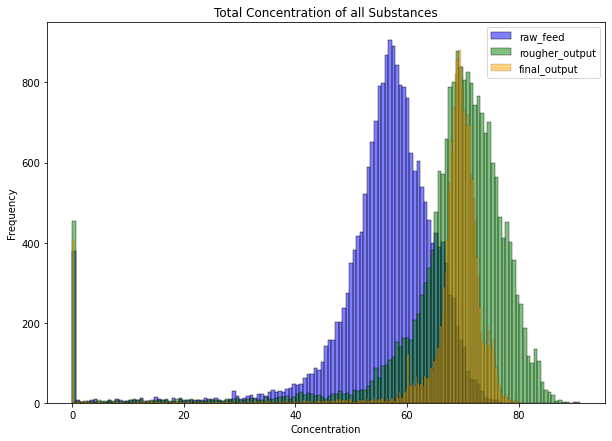

In [48]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(raw_feed_1, color='blue', alpha=0.5, label='raw_feed')
sns.histplot(rougher_concentration_1, color='green', alpha=0.5, label='rougher_output')
sns.histplot(final_concentration_1, color='orange', alpha=0.5, label='final_output')
plt.legend()
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.title('Total Concentration of all Substances')

## Build the model

In [49]:
def final_smape(target, predicted):
    # Calculate sMAPE for rougher concentrate recovery
    rougher_num = np.abs(target.iloc[:, 0] - predicted[:, 0])
    rougher_den = (np.abs(target.iloc[:, 0]) + np.abs(predicted[:, 0])) / 2
    smape_rougher = np.mean(rougher_num / rougher_den) * 100
    
    # Calculate sMAPE for final concentrate recovery
    final_num = np.abs(target.iloc[:, 1] - predicted[:, 1])
    final_den = (np.abs(target.iloc[:, 1]) + np.abs(predicted[:, 1])) / 2
    smape_final = np.mean(final_num / final_den) * 100
    
    # Calculate final sMAPE
    final_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return final_smape

smape_scorer = make_scorer(final_smape, greater_is_better=False)


In [50]:
missed_test_columns = set(list(train_df.columns.values))-set(list(test_df.columns.values))
missed_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery_calculated',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_

In [52]:
columns_to_drop = list(missed_test_columns) + ['date']

features_train = train_df.drop(columns_to_drop, axis=1)
features_train = features_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = train_df[['rougher.output.recovery', 'final.output.recovery']]

common_columns = train_df.columns.intersection(test_df.columns)
features_test = test_df[common_columns].drop('date', axis=1)
features_test = features_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = test_df[['rougher.output.recovery', 'final.output.recovery']]

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [65]:
# Training the Decision Tree model
pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor(random_state=12345))])
parameters = {'regressor__max_depth': range(1, 11)}
grid_search_dt = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring=smape_scorer, error_score='raise')
dt_model = grid_search_dt.fit(features_train_scaled, target_train)
print('Best param:', grid_search_dt.best_params_)
print('Best sMAPE score:', grid_search_dt.best_score_)

Best param: {'regressor__max_depth': 3}
Best sMAPE score: -11.219981345094984


The decision tree model was trained with different max_depths from 1-10. After using GridSearchCV, the best max_dept is 3 with a sMAPE score of 11.21. 

In [55]:
#training with linear Regression model 
pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])
lr_model = pipeline.fit(features_train_scaled, target_train)
smape = cross_val_score(pipeline, features_train_scaled, target_train, cv=5, scoring=smape_scorer)
print('sMAPE:', smape.mean())

sMAPE: -12.877628584526395


Linear Regression has an average final_sMAPE score 12.87 when used 5-fold cross-validation. 

In [57]:
#training Random Forest
pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(random_state=12345))])
parameters = {'regressor__n_estimators': range(10,50,10)}
grid_search_rf = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring=smape_scorer, error_score='raise')
rf_model = grid_search_rf.fit(features_train_scaled, target_train)
print('Best param:', grid_search_rf.best_params_)
print("Best sMAPE score:",grid_search_rf.best_score_)

Best param: {'regressor__n_estimators': 40}
Best sMAPE score: -12.400222404675265


Random Forest model has the best sMAPE score of 12.40 at n_estimator = 40. 

Comparing to the rest of the models, Decision Tree has the lowest sMAPE score, which makes it the best trained model. Therefore, I will use this as the model to run the test dataset.

In [69]:
predicted_values = dt_model.best_estimator_.predict(features_test_scaled)
sMAPE = final_smape(target_test, predicted_values)
print("sMAPE score:", sMAPE)

sMAPE score: 11.474897936419934


The Decision Tree model was performed on test data with the best max_depth=3. It resulted in a sMAPE score of 11.47

## Conclusion: 

In this project, we analyzed and compared three datasets: train, test, and full. We found that the concentration of Au and Ag increased as the purification progresses, which is as expected in the gold beneficiation process; whereas Pb concentration decreased. 

The feed size distribution of rougher input and primary cleaner are similar for both training and testing sets. However, the feed size distribution of the rougher input is greater than that of the primary cleaner, suggesting that the grinding and classification process is effective in reducing the particle size for subsequent processing stages.

The total concentration of three different stages (raw feed, rougher output, and final output) were analyzed. Raw feed has the lowest concentration distribution while the rougher output was the highest. The concentration in the final output was lower than the rougher output but higher than the raw feed. 

For predictive modeling, 3 different models were trained: a decision tree, a random forest, and a linear regression. After some revision with the target and features datasets, the Decision Tree model yieled the lowest sMAPE score, indicating the best model. It was used to test the test data and obtaining a sMAPE score of 11.47.